Nesse projeto vamos trabalhar em cima de um estudo de caso, referente a loja de confeitaria de doces da Bell.

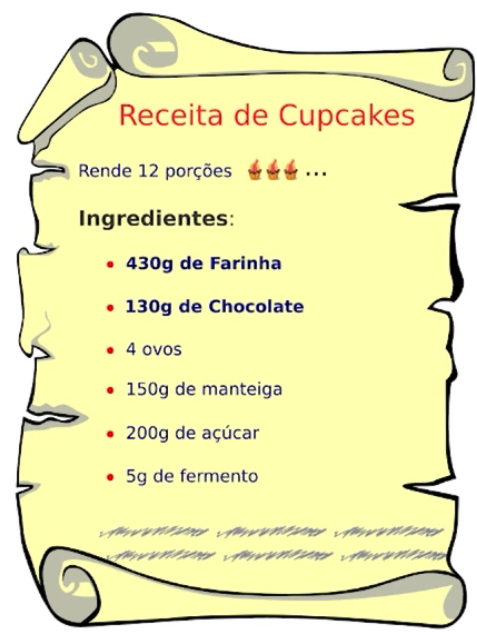

## Coleta de dados

A princípio, poderíamos ter usado qualquer método para a escolha dos pontos experimentais.

Para o caso da Bel, deve estar claro que a linha central que guiou a escolha do planejamento fatorial foi o fato de a coleta de dados ser custosa. Portanto, o planejamento fatorial surge com uma abordagem interessante para se obter informações sobre um sistema em estudo, usando para isso uma pequena quantidade de ensaios.

Em outros contextos, a coleta de dados pode ser simples, barata e rápida. Por exemplo, poderíamos estar realizando um experimento para saber o comportamento de um usuário de um site ou app. Os dados nesse experimento seriam coletados automaticamente à medida que o usuário interagisse com a plataforma. Desse modo, podemos obter um grande número de dados que seriam coletados de forma rápida e pouco custosa. Usar um planejamento fatorial para esse caso não seria necessário, uma vez que o ato de coletar os dados não impoẽm uma barreira à fluidez do experimento; muito menos significa um acréscimo substancial dos gastos por dado adicional coletado.

Como conclusão, podemos afirmar que não existe uma regra para guiar a escolha dos pontos experimentais. Cada caso terá suas particularidades, que influenciarão a definição da melhor abordagem para a coleta dos dados. Contudo, independentemente do método, os pontos experimentais devem ser escolhidos de forma a atender os objetivos do experimento e serem representativos da região de estudo.

## Pontos experimentais normalizados

Como dito, tradicionalmente o planejamento fatorial utiliza as variáveis normalizadas entre -1 e +1. Essa normalização evita termos que lidar com variáveis que possuem magnitudes muito diferentes. Além disso, o uso de valores normalizados permite a inserção de variáveis não numéricas no experimento. Por exemplo, a Bel poderia avaliar o efeito de duas marcas de fermento na quantidade de cupcakes produzidos. Vamos chamar essas duas marcas de A e B. Se não tivéssemos lidando com variáveis normalizadas, não seria direta a inclusão do efeito da marca do fermento na resposta analisada no experimento. Contudo, trabalhando com variáveis normalizadas, essa inserção torna-se natural. Para isso, bastaria dizer que, por exemplo, a marca A será o nível -1 e a marca B o +1. Pronto! Seremos capazes de analisar essa variável não numérica em conjunto com as demais, uma vez que todas elas estão definidas entre os limites -1 e +1.

In [1]:
import pandas as pd
import numpy as np

In [2]:
ensaios = np.array([[-1,-1], [1,-1], [-1,1], [1,1]])

In [3]:
'''
pip install pyDOE2

import pyDOE2 as doe

ensaios = doe.ff2n(2)
## podemos usar pyDOE2 para gerar os pontos experimentais,contudo funciona somente para versões antigas do python'''

'\npip install pyDOE2\n\nimport pyDOE2 as doe\n\nensaios = doe.ff2n(2)\n## podemos usar pyDOE2 para gerar os pontos experimentais,contudo funciona somente para versões antigas do python'

In [4]:
ensaios

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

In [5]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

In [6]:
experimento

,Farinha,Chocolate
0,-1,-1
1,1,-1
2,-1,1
3,1,1


In [7]:
experimento['Porcoes'] = [19, 37, 24, 49]

In [8]:
experimento

,Farinha,Chocolate,Porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49


# Analisando graficamente os resultados


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
sns.set_palette('terrain')

sns.set_style('darkgrid')

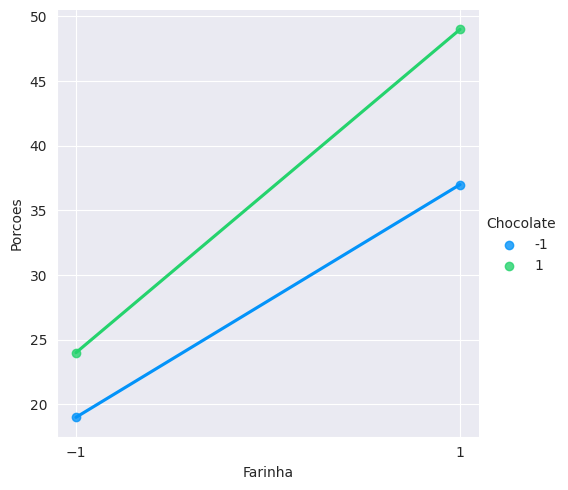

In [11]:
ax = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci = None, hue = 'Chocolate')
ax.set(xticks = (-1,1))

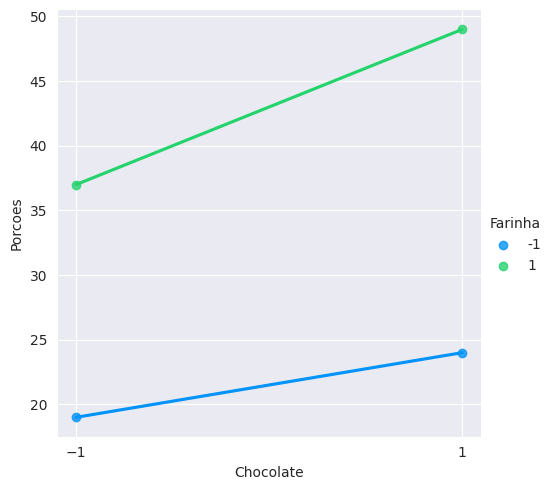

In [12]:
ax = sns.lmplot(data = experimento, x = 'Chocolate', y = 'Porcoes', ci = None, hue = 'Farinha')
ax.set(xticks = (-1,1))

##Modelo estatístico


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
modelo = smf.ols(formula = 'Porcoes ~ Farinha + Chocolate + Farinha: Chocolate', data = experimento)

In [15]:
modelo_ajustado = modelo.fit()

In [16]:
print(modelo_ajustado. summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Jul 2024   Prob (F-statistic):                nan
Time:                        23:45:57   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw =

###Graus de liberdade


In [17]:
centro = np.array([
    [0,0,29],
    [0,0,30],
    [0,0,29],
    [0,0,30]
])

In [18]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index = [4,5,6,7])

In [19]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [20]:
experimento = pd.concat([experimento, centro_dataframe])

In [21]:
experimento

,Farinha,Chocolate,Porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


 # Análise de significancia estatística

In [22]:
modelo = smf.ols(formula = 'Porcoes ~ Farinha + Chocolate + Farinha: Chocolate', data = experimento)

In [23]:
modelo_ajustado = modelo.fit()

In [24]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 29 Jul 2024   Prob (F-statistic):            0.00152
Time:                        23:45:58   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


#Gráfico padronizado de Pareto

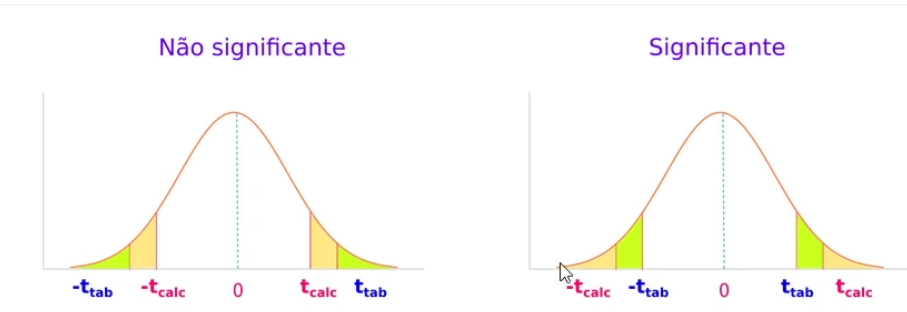

In [25]:
t_valores = modelo_ajustado.tvalues

In [26]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [27]:
nome = t_valores.index.to_list()

In [28]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

Text(0.5, 0, 'Valor t')

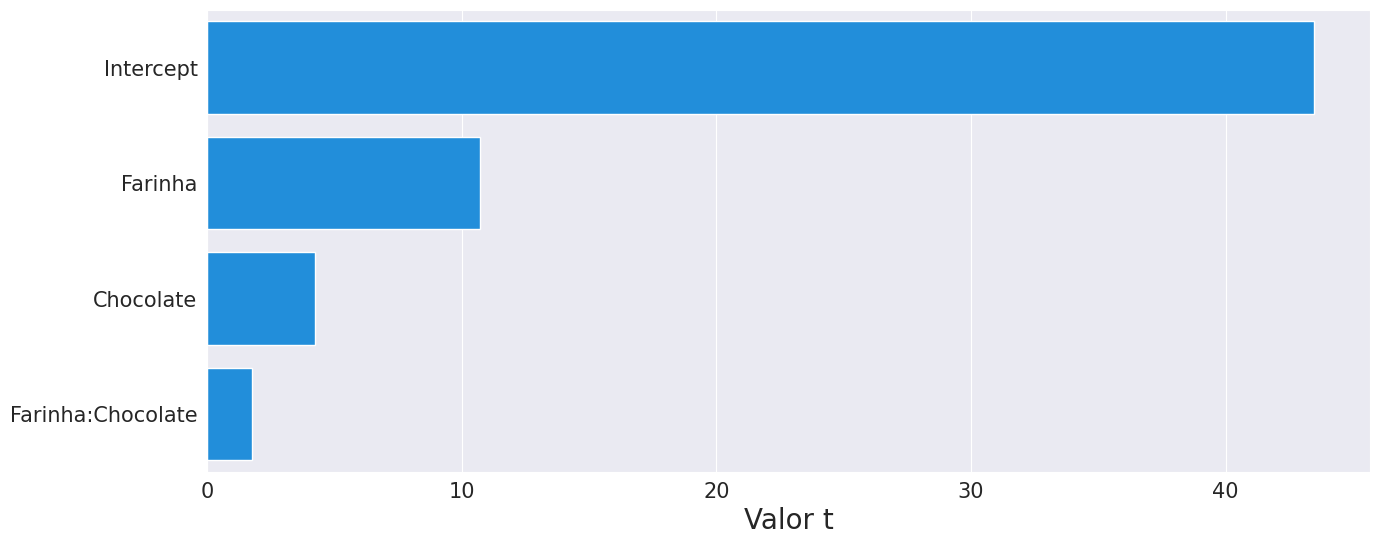

In [29]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 15)
pareto.set_xlabel('Valor t', fontsize = 20)

In [30]:
from scipy import stats

In [31]:
distribuicao = stats.t(df = 4)

In [32]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [33]:
limite = [distribuicao.ppf(q = 1 - 0.025)] *len(nome)

In [34]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

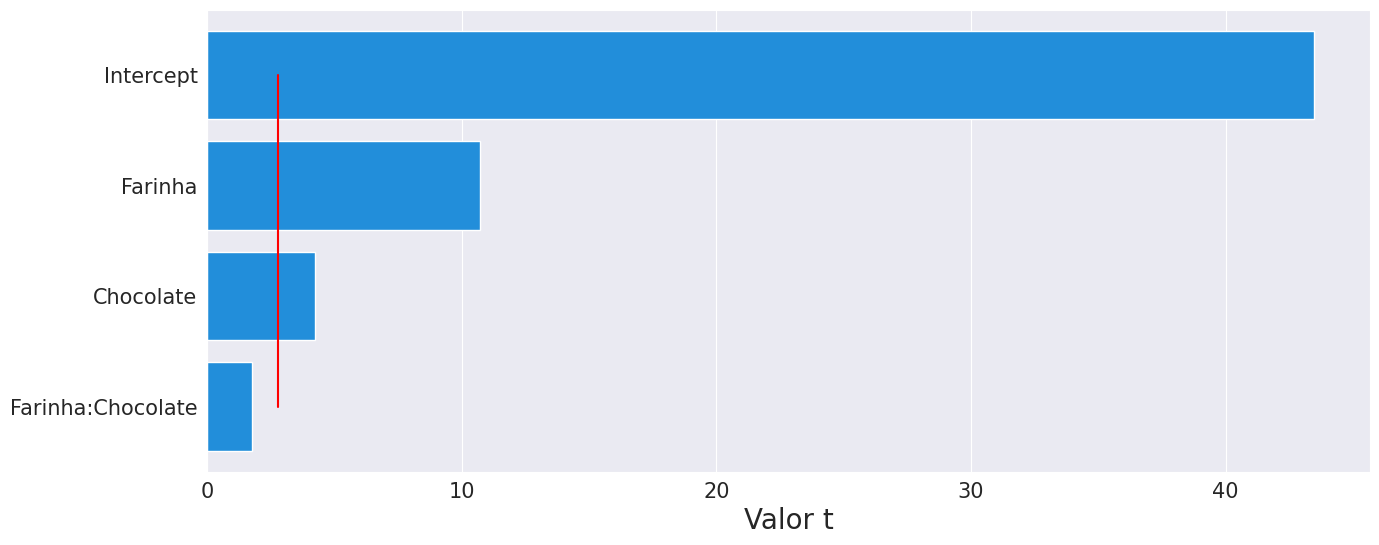

In [35]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 15)
pareto.set_xlabel('Valor t', fontsize = 20)

pareto.plot(limite, nome, 'r')

#Novo modelo

In [36]:
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [37]:
modelo_ajustado_2 = modelo_2.fit()

In [38]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           0.000571
Time:                        23:46:01   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [39]:
t_valores = modelo_ajustado_2.tvalues

In [40]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [41]:
nome = t_valores.index.to_list()

In [42]:
nome

['Intercept', 'Farinha', 'Chocolate']

Text(0.5, 0, 'Valor t')

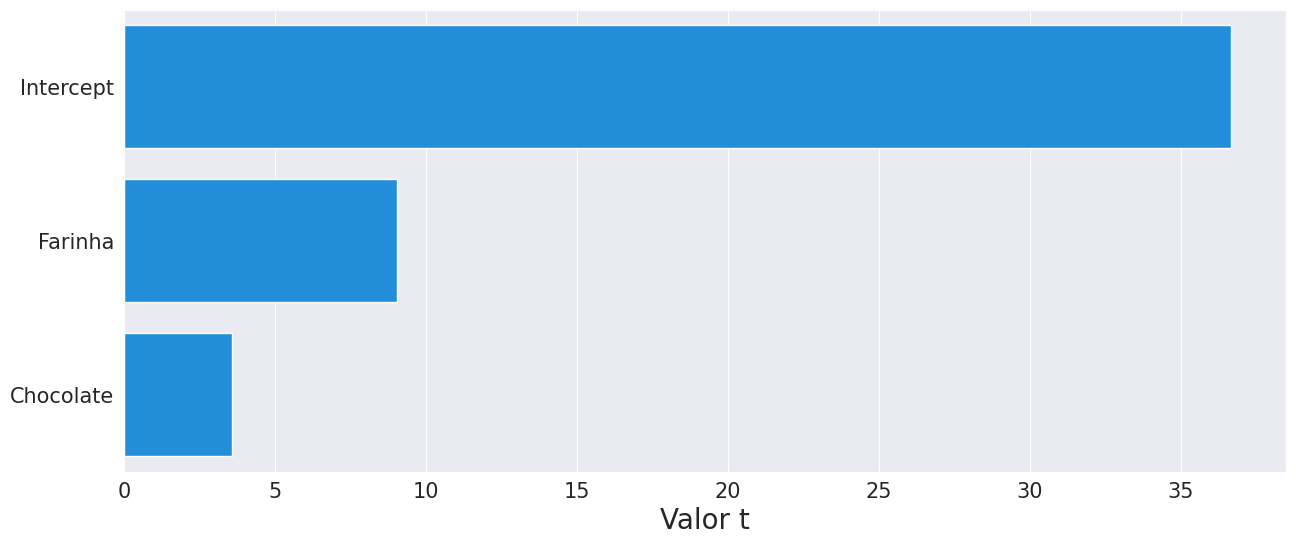

In [43]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 15)
pareto.set_xlabel('Valor t', fontsize = 20)

In [44]:
distribuicao = stats.t(df = 5)

In [45]:
distribuicao.ppf(q = 1 - 0.025)

2.570581835636314

In [46]:
limite = [distribuicao.ppf(q = 1 - 0.025)] *len(nome)

In [47]:
limite

[2.570581835636314, 2.570581835636314, 2.570581835636314]

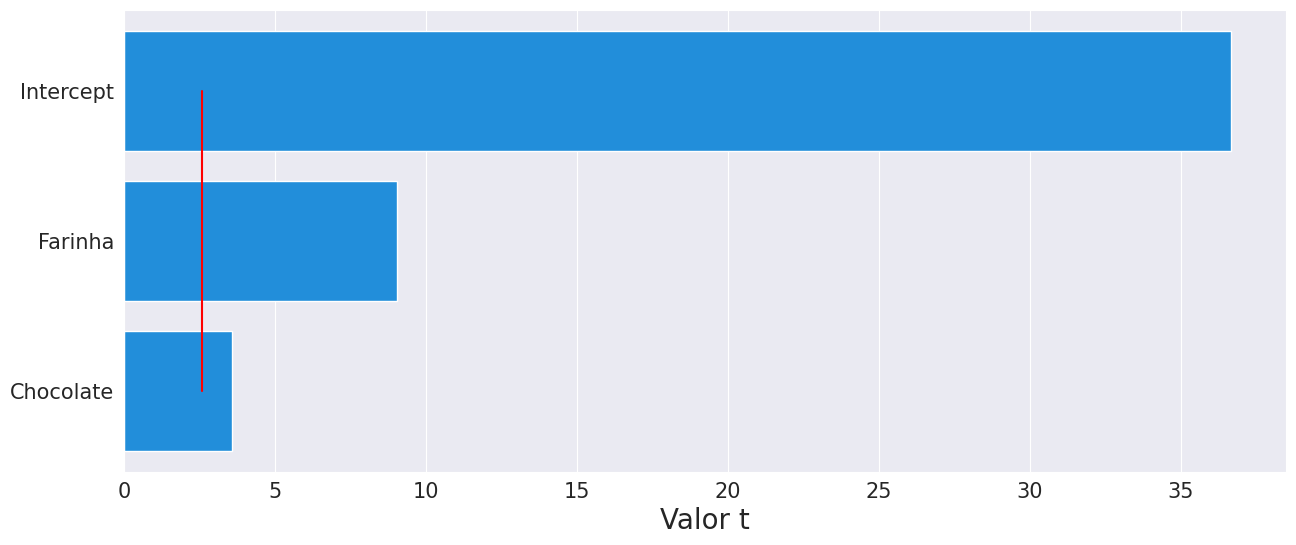

In [48]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 15)
pareto.set_xlabel('Valor t', fontsize = 20)

pareto.plot(limite, nome, 'r')

# Preditos por observados

In [49]:
observados = experimento['Porcoes']

In [50]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [51]:
preditos = modelo_ajustado_2.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [52]:
import matplotlib.pyplot as plt

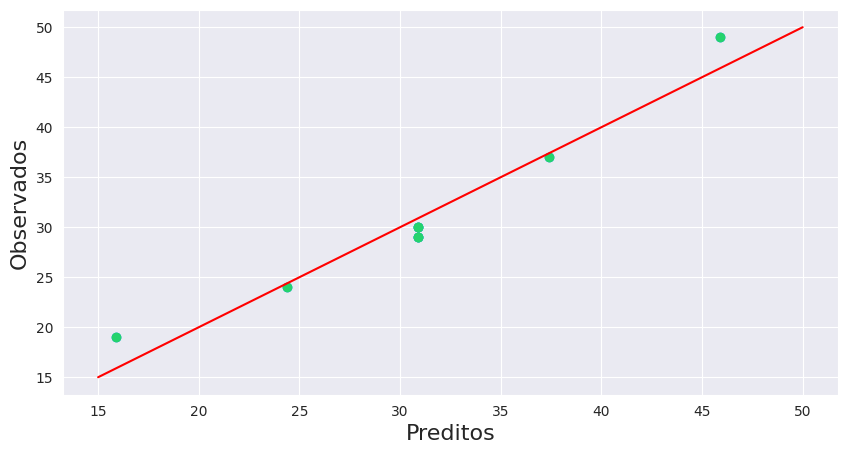

In [53]:
plt.figure(figsize = (10,5))

plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)

plt.scatter(x = preditos, y = observados)

x = np.linspace(start = 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)

plt.plot(x, y, 'r')

plt.scatter(x = preditos, y = observados)

#Explorando o Modelo

In [54]:
parametros = modelo_ajustado_2.params

In [55]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

In [59]:
def modelo_receita( x_f, x_c):

  ## limites
  limite_normalizado = [-1,+1]
  limite_farinha = [0.5, 1.5]
  limite_chocolate = [0.1,0.5]

  #convertendo
  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)


  porcoes = parametros['Intercept'] + parametros['Farinha'] * x_f_convertido + parametros['Chocolate'] * x_c_convertido
  return round(porcoes)

In [62]:
modelo_receita(0.6,0.1)

18

# Mapa de cores


In [63]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 100)
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 100)

In [65]:
pontos = []
for i in x_farinha:

  temp = []
  for j in x_chocolate:

    temp.append(modelo_receita(i,j))

  pontos.append(temp)

In [66]:
pontos

[[16,
  16,
  16,
  16,
  16,
  16,
  16,
  16,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  22,
  23,
  23,
  23,
  23,
  23,
  23,
  23,
  23,
  23,
  23,
  23,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24],
 [16,
  16,
  16,
  16,
  16,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  21,
  22,
  22,
  22,
  2

In [67]:
import matplotlib.cm as cm

<a list of 8 text.Text objects>

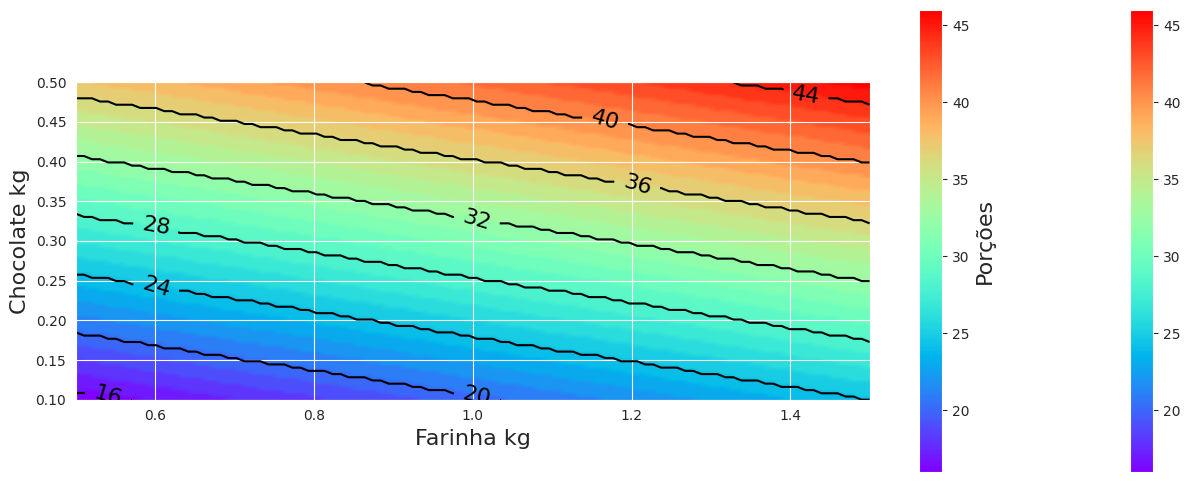

In [75]:
plt.figure(figsize = (16,6))
plt.xlabel('Farinha kg', fontsize = 16)
plt.ylabel('Chocolate kg', fontsize = 16)

mapa_cor = plt.imshow(pontos, origin = 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5,1.5, 0.1,0.5))
plt.colorbar(mapa_cor)

## barra de cor

plt.colorbar().set_label('Porções', fontsize = 16)

## linhas

linhas = plt.contour(x_farinha, x_chocolate, pontos, colors = 'black', linewidths = 1.5)
plt.clabel(linhas, inline = True, fontsize = 16, inline_spacing = 10)
